Se importan las librerias 

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 

def Armonicos (señal, tiempo, n):
    an=0
    bn=0
    T=len(tiempo)
    for i in range (0,T,1):
        an+=2/T * señal[i]*np.cos(n*2*np.pi*60*tiempo[i])
        bn+=2/T * señal[i]*np.sin(n*2*np.pi*60*tiempo[i])
        if i==0:
            an0=an
            bn0=bn
    An=np.sqrt((an**2)+(bn**2))
    theta_n=np.arctan(bn/an)
    gamma_n=np.arctan(an/bn)
    return An ,theta_n, gamma_n, an0

##Para obtener los datos de los puntos organizados
def get_oscilloscope(ruta):
    Dataframe=pd.read_csv(ruta)
    Dataframe=Dataframe.iloc[:, 3:5] 
    Dataframe.columns=["Tiempo", "Magnitud"]
    return Dataframe  
def buscaarmonicos(magnitud, tiempo):
    n=50
    armonicos=np.zeros(n)
    thetas= np.zeros(n)
    gammas=np.zeros(n)
    for i in range(1,n,1):
        armonicos[i] ,thetas[i], gammas[i], an0  =Armonicos(magnitud,tiempo,i)
    ft=an0
    
    ft+=armonicos*np.cos(i*2*np.pi*60*tiempo-thetas)

    ft_total=np.sum(ft)
    return ft,armonicos

Carga inductiva

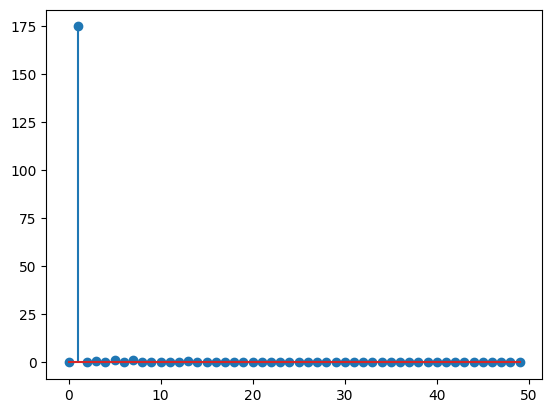

123.69755548956348

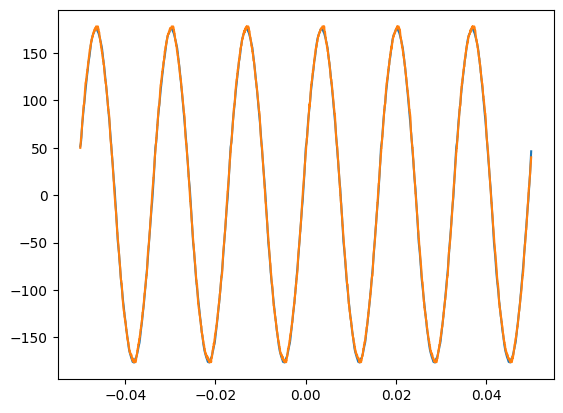

In [163]:
CH1=get_oscilloscope("abanico/CH1.CSV")#Tension en el canal 1/2
CH2=get_oscilloscope("abanico/CH2.CSV")
R=10.4
CURRENT=(CH2.Magnitud-CH1.Magnitud)/10
ACTIVE_POWER=CURRENT*CH1.Magnitud



##Componentes armonicos

Valor_RMS=np.sqrt(np.mean(np.square(CH1.Magnitud)))
ft, armonicos =buscaarmonicos(CH1.Magnitud, CH1.Tiempo)
plt.stem(armonicos)
plt.show()
plt.plot(CH1.Tiempo,ft)
plt.plot(CH1.Tiempo,CH1.Magnitud)
Valor_RMS

## Carga no lineal

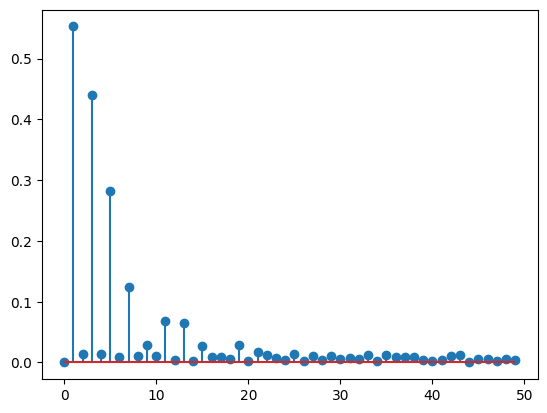

0.5638728800331835

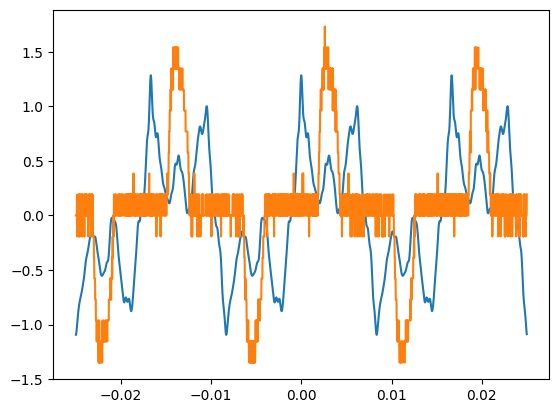

In [164]:
CH1=get_oscilloscope("PC\ALL0001\F0001CH1.CSV")#Tension en el canal 1/2
CH2=get_oscilloscope("PC\ALL0001\F0001CH2.CSV")

R=10.4
CURRENT=(CH1.Magnitud-CH2.Magnitud)/R
ACTIVE_POWER=CURRENT*CH1.Magnitud



##Componentes armonicos

Valor_RMS=np.sqrt(np.mean(np.square(CURRENT)))
ft, armonicos =buscaarmonicos(CURRENT, CH1.Tiempo)
plt.stem(armonicos)
plt.show()
plt.plot(CH1.Tiempo,ft)
plt.plot(CH1.Tiempo,CURRENT)
Valor_RMS